In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [2]:
df = pd.read_csv('Train_HR_Employee_Attrition_New.csv') 

In [3]:
pd.set_option('max_columns', None)
df.head(10)


,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsInCurrentRole,ChangeCompanyRate,Satisfaction
0,52.0,0,1,9,4,0,0,0,0,8446.0,0,17,3.0,0,20,2.0,7,9.047619,13
1,36.0,0,1,1,1,1,0,1,1,4834.0,1,14,3.0,1,21,3.0,8,1.045455,14
2,37.0,0,2,16,3,1,0,2,1,4768.0,1,25,3.0,1,7,4.0,5,1.125000,16
3,33.0,0,1,5,4,2,0,3,0,2799.0,0,14,3.0,0,12,1.0,7,2.076923,12
4,37.0,0,1,9,2,1,1,4,0,7978.0,0,12,3.0,0,2,2.0,2,1.333333,16
5,35.0,0,1,7,3,1,0,3,1,2269.0,0,11,3.0,3,4,2.0,2,1.200000,18
6,27.0,0,1,4,2,1,0,5,2,8726.0,0,11,3.0,1,6,0.0,3,2.142857,12
7,37.0,0,1,8,2,1,1,2,1,5731.0,0,18,3.0,1,13,2.0,7,1.071429,12
8,42.0,0,1,1,3,1,0,2,2,5410.0,0,12,3.0,1,19,3.0,7,0.050000,14
9,23.0,0,2,3,1,0,0,2,1,1790.0,1,20,3.0,2,6,2.0,5,1.142857,17


In [4]:
correlation=df[df.columns[0:]].corr()['Attrition'][:]
correlation.abs().sort_values(ascending=False)

Attrition                1.000000
OverTime                 0.243083
Satisfaction             0.213709
YearsInCurrentRole       0.175432
TotalWorkingYears        0.172216
MaritalStatus            0.152129
StockOptionLevel         0.144273
DistanceFromHome         0.063296
EducationField           0.059268
ChangeCompanyRate        0.049432
TrainingTimesLastYear    0.041914
PercentSalaryHike        0.032365
Education                0.028971
JobRole                  0.026019
Age                      0.022561
Gender                   0.018168
PerformanceRating        0.014869
BusinessTravel           0.005022
MonthlyIncome            0.004533
Name: Attrition, dtype: float64

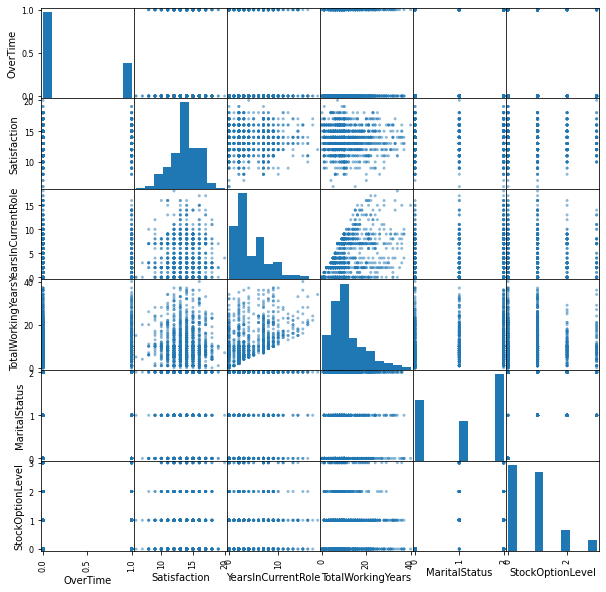

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['OverTime','Satisfaction','YearsInCurrentRole','TotalWorkingYears','MaritalStatus','StockOptionLevel']], figsize=(10, 10))
plt.show()

In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [7]:
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Age                       10
Attrition                192
BusinessTravel           305
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobRole                    0
MaritalStatus              0
MonthlyIncome             80
OverTime                   0
PercentSalaryHike          0
PerformanceRating        158
StockOptionLevel          67
TotalWorkingYears         49
TrainingTimesLastYear    152
YearsInCurrentRole        17
ChangeCompanyRate         40
Satisfaction               5
dtype: int64

In [8]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


In [9]:
df=remove_outlier(df,'Satisfaction')
df=remove_outlier(df,'YearsInCurrentRole')
df=remove_outlier(df,'TotalWorkingYears')
df=remove_outlier(df,'TotalWorkingYears')

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


Age                        9
Attrition                177
BusinessTravel           271
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobRole                    0
MaritalStatus              0
MonthlyIncome             76
OverTime                   0
PercentSalaryHike          0
PerformanceRating        129
StockOptionLevel          59
TotalWorkingYears          0
TrainingTimesLastYear    134
YearsInCurrentRole         0
ChangeCompanyRate         33
Satisfaction               0
dtype: int64

In [11]:
df.reset_index(drop=True)

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsInCurrentRole,ChangeCompanyRate,Satisfaction
0,52.0,0,1,9,4,0,0,0,0,8446.0,0,17,3.0,0,20,2.0,7,9.047619,13
1,37.0,0,2,16,3,1,0,2,1,4768.0,1,25,3.0,1,7,4.0,5,1.125000,16
2,33.0,0,1,5,4,2,0,3,0,2799.0,0,14,3.0,0,12,1.0,7,2.076923,12
3,37.0,0,1,9,2,1,1,4,0,7978.0,0,12,3.0,0,2,2.0,2,1.333333,16
4,35.0,0,1,7,3,1,0,3,1,2269.0,0,11,3.0,3,4,2.0,2,1.200000,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,37.0,0,1,16,2,0,1,4,1,2115.0,1,13,3.0,2,1,3.0,0,1.500000,16
1009,33.0,1,0,6,4,1,1,2,2,5147.0,1,18,3.0,0,12,2.0,7,4.076923,10
1010,33.0,0,1,4,1,4,0,2,2,2500.0,0,12,3.0,0,5,2.0,2,1.166667,11
1011,45.0,0,0,3,4,4,0,2,0,4385.0,1,16,3.0,0,15,2.0,4,3.062500,13


In [12]:
attrition= df['Attrition']
del df['Attrition']
df.head()

,Age,BusinessTravel,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsInCurrentRole,ChangeCompanyRate,Satisfaction
0,52.0,1,9,4,0,0,0,0,8446.0,0,17,3.0,0,20,2.0,7,9.047619,13
2,37.0,2,16,3,1,0,2,1,4768.0,1,25,3.0,1,7,4.0,5,1.125000,16
3,33.0,1,5,4,2,0,3,0,2799.0,0,14,3.0,0,12,1.0,7,2.076923,12
4,37.0,1,9,2,1,1,4,0,7978.0,0,12,3.0,0,2,2.0,2,1.333333,16
5,35.0,1,7,3,1,0,3,1,2269.0,0,11,3.0,3,4,2.0,2,1.200000,18


In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [14]:
df_c=df[['Satisfaction','TotalWorkingYears','YearsInCurrentRole']]

In [15]:
df_c.head()

,Satisfaction,TotalWorkingYears,YearsInCurrentRole
0,13,20,7
2,16,7,5
3,12,12,7
4,16,2,2
5,18,4,2


In [16]:
scaler1 = StandardScaler()
X = scaler1.fit_transform(df_c.values)
X

array([[-0.29620209,  2.38621237,  0.99303717],
       [ 1.13035599, -0.34559939,  0.37627037],
       [-0.77172145,  0.70509744,  0.99303717],
       ...,
       [-1.24724081, -0.76587812, -0.54887984],
       [-0.29620209,  1.33551554,  0.06788697],
       [-0.77172145, -1.81657495, -1.16564664]])

In [17]:
scaler= RobustScaler()
Y = scaler.fit_transform(df_c.values)
Y

array([[-0.33333333,  2.        ,  0.8       ],
       [ 0.66666667, -0.16666667,  0.4       ],
       [-0.66666667,  0.66666667,  0.8       ],
       ...,
       [-1.        , -0.5       , -0.2       ],
       [-0.33333333,  1.16666667,  0.2       ],
       [-0.66666667, -1.33333333, -0.6       ]])

In [18]:
scaler2= MinMaxScaler()
Z = scaler2.fit_transform(df_c.values)
Z

array([[0.45454545, 1.        , 0.5       ],
       [0.72727273, 0.35      , 0.35714286],
       [0.36363636, 0.6       , 0.5       ],
       ...,
       [0.27272727, 0.25      , 0.14285714],
       [0.45454545, 0.75      , 0.28571429],
       [0.36363636, 0.        , 0.        ]])

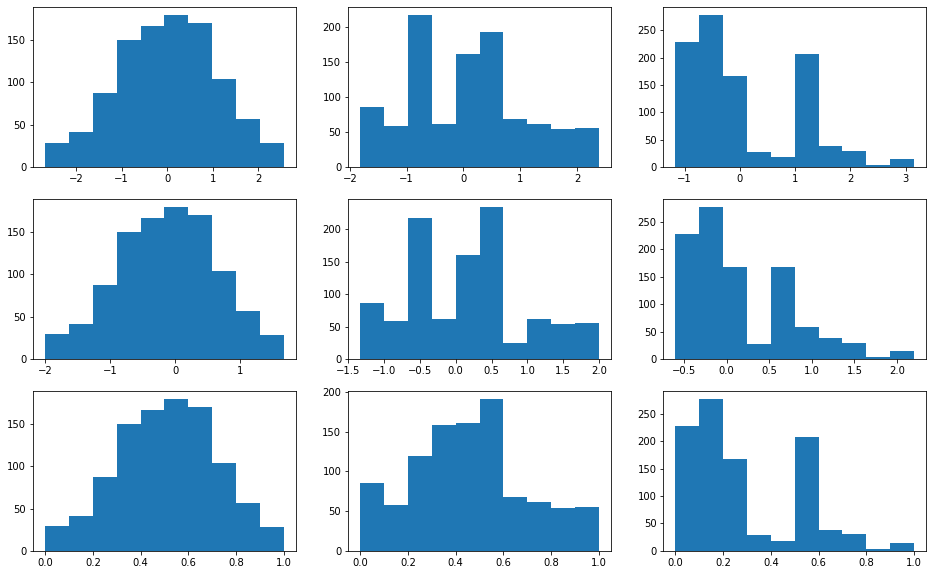

In [19]:
fig = plt.figure(figsize=(16,10)) 
fig_dims = (3, 3)

plt.subplot2grid(fig_dims, (0, 0))
plt.hist(X[:,0])

plt.subplot2grid(fig_dims, (0, 1))
plt.hist(X[:,1])

plt.subplot2grid(fig_dims, (0, 2))
plt.hist(X[:,2])

plt.subplot2grid(fig_dims, (1, 0))
plt.hist(Y[:,0])

plt.subplot2grid(fig_dims, (1, 1))
plt.hist(Y[:,1])

plt.subplot2grid(fig_dims, (1, 2))
plt.hist(Y[:,2])

plt.subplot2grid(fig_dims, (2, 0))
plt.hist(Z[:,0])

plt.subplot2grid(fig_dims, (2, 1))
plt.hist(Z[:,1])

plt.subplot2grid(fig_dims, (2, 2))
plt.hist(Z[:,2])

plt.show()

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [21]:
kmeans = KMeans(n_clusters=2, n_init=20, max_iter=100)
kmeans.fit(Y)

KMeans(max_iter=100, n_clusters=2, n_init=20)

In [22]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1]), array([420, 593], dtype=int64))

In [23]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 420, 1: 593}

In [24]:
kmeans.cluster_centers_
centers = scaler.inverse_transform(kmeans.cluster_centers_)

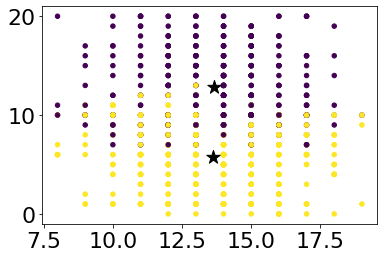

In [25]:
plt.scatter(df_c['Satisfaction'], df_c['TotalWorkingYears'], 
            c=kmeans.labels_, s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

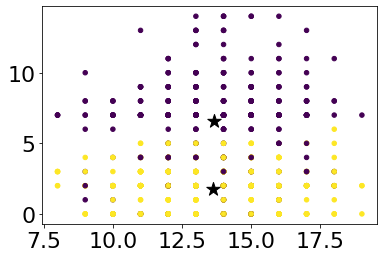

In [26]:
plt.scatter(df_c['Satisfaction'], df_c['YearsInCurrentRole'], 
            c=kmeans.labels_, s=20)
plt.scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

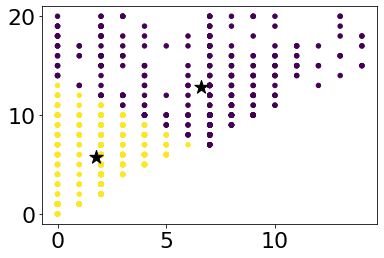

In [27]:
plt.scatter(df_c['YearsInCurrentRole'], df_c['TotalWorkingYears'], 
            c=kmeans.labels_, s=20)
plt.scatter(centers[:, 2], centers[:, 1], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [28]:
np.unique(kmeans.labels_)

array([0, 1])

In [29]:
df_c['cluster']=kmeans.labels_

<ipython-input-29-87dc013e20fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['cluster']=kmeans.labels_


In [30]:
df_c.head()

,Satisfaction,TotalWorkingYears,YearsInCurrentRole,cluster
0,13,20,7,0
2,16,7,5,1
3,12,12,7,0
4,16,2,2,1
5,18,4,2,1


In [33]:
import plotly.graph_objects as go

PLOT = go.Figure()

for c in list(np.unique(kmeans.labels_)):
    
    PLOT.add_trace(go.Scatter3d(x = df_c[df_c.cluster == c]['TotalWorkingYears'],
                                y = df_c[df_c.cluster == c]['YearsInCurrentRole'],
                                z = df_c[df_c.cluster == c]['Satisfaction'],
                                mode = 'markers', marker_size = 7, marker_line_width = 1,
                                name = 'Attrition=  ' + str(c)))
    
    PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'TotalWorkingYears', titlefont_color = 'black'),
                                yaxis=dict(title = 'YearsInCurrentRole', titlefont_color = 'black'),
                                zaxis=dict(title = 'Satisfaction', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))
PLOT.show()

In [34]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(Y, kmeans.labels_))

SSE 988.6680325668933
Silhouette 0.34274473721008475


In [35]:
del df_c['Attrition']

KeyError: 'Attrition'

In [ ]:
del df_c['cluster']

In [ ]:
sse_list = list()
sil_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=50, max_iter=200)
    kmeans.fit(Y)
    
    sse = kmeans.inertia_
    sil = silhouette_score(Y, kmeans.labels_)
    sse_list.append(sse)
    sil_list.append(sil)

In [36]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

NameError: name 'sse_list' is not defined

NameError: name 'sse_list' is not defined

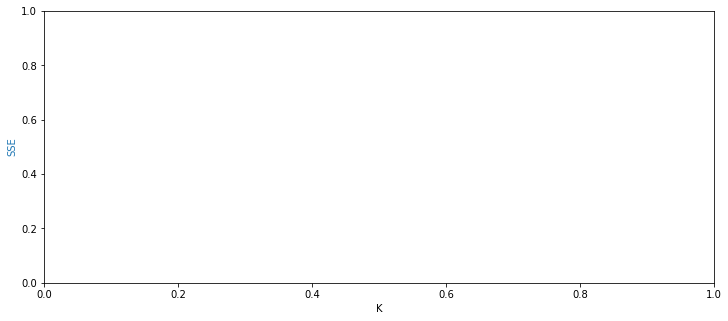

In [37]:
fig, ax1 = plt.subplots(figsize=(12, 5))
t = np.arange(1, 50, 1)
color = 'tab:blue'
ax1.set_xlabel('K')
ax1.set_ylabel('SSE', color=color)
ax1.plot(t, sse_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(t, sil_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [38]:
kmeans= KMeans(n_clusters=2, n_init=50, max_iter=100)
kmeans.fit(Y)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(Y, kmeans.labels_))

SSE 988.6680325668933
Silhouette 0.34274473721008475


In [39]:
kmeans= KMeans(n_clusters=3, n_init=50, max_iter=100)
kmeans.fit(Y)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(Y, kmeans.labels_))

SSE 759.5218470378794
Silhouette 0.29877849050925176


In [40]:
kmeans= KMeans(n_clusters=4, n_init=50, max_iter=100)
kmeans.fit(Y)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(Y, kmeans.labels_))

SSE 633.6070574156028
Silhouette 0.3083731106567718


In [41]:
kmeans= KMeans(n_clusters=5, n_init=50, max_iter=100)
kmeans.fit(Y)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(Y, kmeans.labels_))

SSE 542.9064055747884
Silhouette 0.27920359782355003


In [42]:
kmeans= KMeans(n_clusters=8, n_init=50, max_iter=100)
kmeans.fit(Y)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(Y, kmeans.labels_))

SSE 370.8616210586805
Silhouette 0.2939173569328506


In [43]:
kmeans= KMeans(n_clusters=9, n_init=50, max_iter=100)
kmeans.fit(Y)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(Y, kmeans.labels_))

SSE 334.3190777699981
Silhouette 0.2997358104859864


In [44]:
kmeans= KMeans(n_clusters=10, n_init=50, max_iter=100)
kmeans.fit(Y)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(Y, kmeans.labels_))

SSE 307.6086949045882
Silhouette 0.30290055673981653


In [45]:
kmeans= KMeans(n_clusters=11, n_init=50, max_iter=100)
kmeans.fit(Y)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(Y, kmeans.labels_))

SSE 286.54267400680203
Silhouette 0.30696478368961566


In [46]:
kmeans= KMeans(n_clusters=10, n_init=50, max_iter=100)
kmeans.fit(Y)
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(Y, kmeans.labels_))

SSE 307.48651936277565
Silhouette 0.3054068523805664


In [47]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers

df_c.columns

Index(['Satisfaction', 'TotalWorkingYears', 'YearsInCurrentRole', 'cluster'], dtype='object')

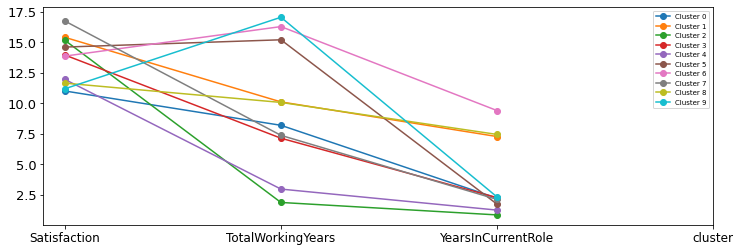

In [48]:


plt.figure(figsize=(12, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i )
plt.tick_params(axis='both', which='major', labelsize=13)
plt.xticks(range(0, len(df_c.columns)), df_c.columns, fontsize=12)
plt.legend(fontsize=7)
plt.show()

In [49]:
df_c['cluster']=kmeans.labels_

<ipython-input-49-87dc013e20fa>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:

import plotly.graph_objects as go

PLOT = go.Figure()

for c in list(np.unique(kmeans.labels_)):
    
    PLOT.add_trace(go.Scatter3d(x = df_c[df_c.cluster == c]['TotalWorkingYears'],
                                y = df_c[df_c.cluster == c]['YearsInCurrentRole'],
                                z = df_c[df_c.cluster == c]['Satisfaction'],
                                mode = 'markers', marker_size = 6, marker_line_width = 1,
                                name = 'Cluster ' + str(c)))
    
    PLOT.update_layout(width = 950, height = 600, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'TotalWorkingYears', titlefont_color = 'black'),
                                yaxis=dict(title = 'YearsInCurrentRole', titlefont_color = 'black'),
                                zaxis=dict(title = 'Satisfaction', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))
PLOT.show()

<ipython-input-104-2bb4ab39cb6f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



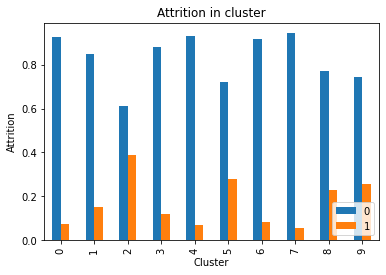

In [104]:
df_c['Attrition']=attrition
attr=pd.crosstab(df_c['cluster'],df_c['Attrition'])
attr=attr.div(attr.sum(1).astype(float),axis=0)
attr.plot(kind='bar', stacked=False ,title='Attrition in cluster')
plt.ylabel('Attrition')
plt.xlabel('Cluster')
plt.legend(loc='lower right')
plt.show()